# Linear model for Boston

You try to process a very similar dataset to the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

## Sub dataset
- Data = structure with filled data
- m = number of rows = 100
- x's = input variable / features
- y's = output variable / target
- (x, y) = one row from training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

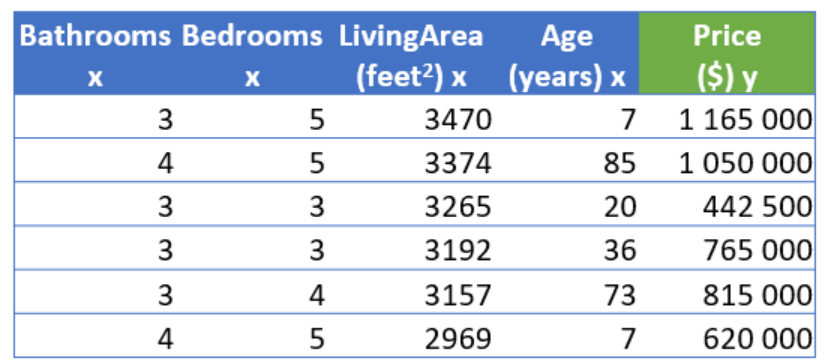

# Task
- Create a regression linearization model from the parameters you selected last exercise
- Standardize the data before processing
- Create the model manually
- Create the model using scikit-learn

# Data loading

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

In [37]:
data=data.dropna()

In [38]:
#We split the data into input parameters X and results Y
X = pd.DataFrame(np.c_[data['livingArea']], columns = ['livingArea'])
Y = data['price']

In [45]:
def split_and_standardize(X, Y, test_size=0.2):
    # 1. Dividir en entrenamiento y validación
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    # 2. Estandarización (StandardScaler: z = (x - u) / s)
    # Importante: Hacemos fit solo con TRAIN, y transformamos ambos.
    scaler_x = StandardScaler()
    X_train_std = scaler_x.fit_transform(X_train)
    X_val_std = scaler_x.transform(X_val)
    
    # Convertir Y a numpy array para facilitar cálculos vectoriales
    Y_train = Y_train.to_numpy()
    Y_val = Y_val.to_numpy()
    
    return X_train_std, Y_train, X_val_std, Y_val, scaler_x

# Ejecutar división
X_train, Y_train, X_val, Y_val, scaler = split_and_standardize(X, Y)

print("Shapes después de split y estandarización:")
print(X_train.shape, Y_train.shape)

Shapes después de split y estandarización:
(80, 1) (80,)


# Linear model without using libraries
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

In [46]:
#Main functionsrning rate alpha
def initialize(dim):
    """ Inicializa bias y weights aleatoriamente """
    bias = random.random()
    weights = np.random.rand(dim)
    return bias, weights

def predict(X, bias, weights):
    """ Predice Y = X*w + b """
    # X es matriz (m, 1), weights es vector (1,)
    return bias + np.dot(X, weights)

def get_cost(Y, Y_predicted):
    """ Calcula el Error Cuadrático Medio (MSE) """
    Y_resd = Y - Y_predicted
    return np.sum(Y_resd**2) / len(Y)

def update_weights(X, Y, Y_predicted, bias_0, weights_0, learning_rate):
    """ Descenso de gradiente: actualiza pesos y sesgo """
    m = len(Y)
    
    # Derivadas parciales
    dw = -(2/m) * np.dot(X.T, (Y - Y_predicted))
    db = -(2/m) * np.sum(Y - Y_predicted)
    
    # Actualización
    weights_1 = weights_0 - learning_rate * dw
    bias_1 = bias_0 - learning_rate * db
    
    return bias_1, weights_1
def get_cost(Y, Y_predicted):
    """ Return MSE for real and predicted ouput data
    """
    Y_resd = Y - Y_predicted
    return np.sum(np.dot(Y_resd.T,Y_resd))/(len(Y-Y_resd)*2)

In [47]:
def run_gradient_descent(X, Y, learning_rate, num_iterations):
    
    # Inicialización
    bias, weights = initialize(X.shape[1])
    history = [] # Para guardar el historial de costos
    
    for i in range(num_iterations):
        # 1. Predecir
        Y_pred = predict(X, bias, weights)
        
        # 2. Calcular costo
        cost = get_cost(Y, Y_pred)
        history.append(cost)
        
        # 3. Actualizar pesos
        bias, weights = update_weights(X, Y, Y_pred, bias, weights, learning_rate)
        
    return history, bias, weights

# --- EJECUCIÓN DEL ENTRENAMIENTO ---
# Como los datos están estandarizados, podemos usar un learning rate razonable (ej. 0.1)
learning_rate = 0.1
iterations = 500

history, bias_manual, weights_manual = run_gradient_descent(X_train, Y_train, learning_rate, iterations)

print("Parámetros finales (Manual):")
print(f"Bias: {bias_manual}")
print(f"Weights: {weights_manual}")

Parámetros finales (Manual):
Bias: 515525.2874999999
Weights: [120838.64334028]


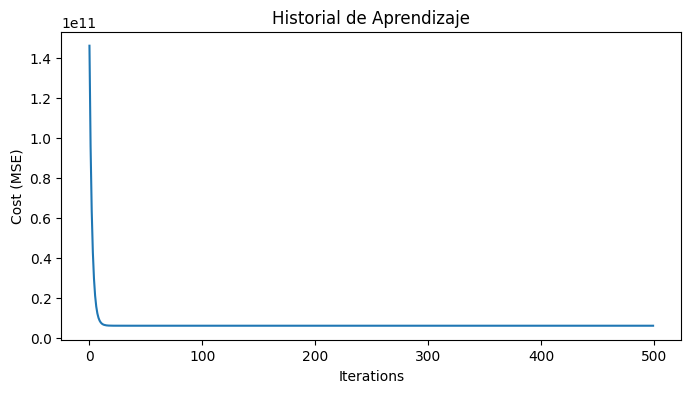

Manual Model - R2 Score: 0.6503
Manual Model - RMSE: 117444.34


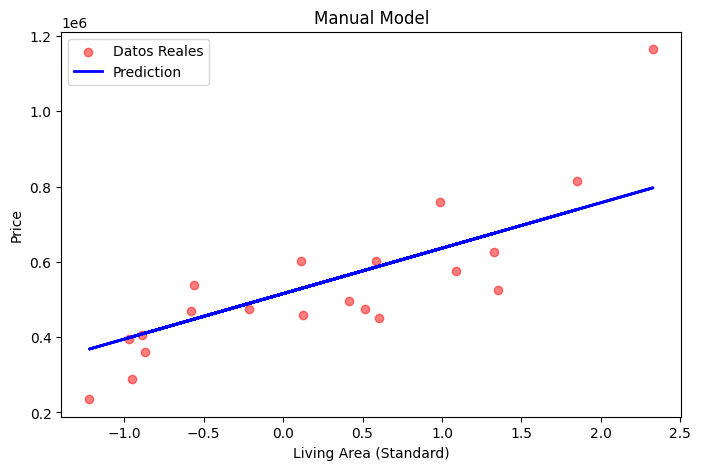

In [ ]:
# Graficar la curva de aprendizaje (Cost function)
plt.figure(figsize=(8, 4))
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Historial de Aprendizaje")
plt.show()

# Evaluar modelo en datos de VALIDACIÓN
Y_val_pred_manual = predict(X_val, bias_manual, weights_manual)

# Métricas
r2_manual = r2_score(Y_val, Y_val_pred_manual)
rmse_manual = np.sqrt(mean_squared_error(Y_val, Y_val_pred_manual))

print(f"Manual Model - R2 Score: {r2_manual:.4f}")
print(f"Manual Model - RMSE: {rmse_manual:.2f}")

# Visualización de la regresión
def visualize_model(X_std, Y_real, Y_pred, title="Modelo Lineal"):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_std, Y_real, color='red', alpha=0.5, label='Datos Reales')
    plt.plot(X_std, Y_pred, color='blue', linewidth=2, label='Prediction')
    plt.title(title)
    plt.xlabel("Living Area (Standard)")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

visualize_model(X_val, Y_val, Y_val_pred_manual, "Manual Model")

# Linear model using scikit-learn
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

In [61]:
#Creating a linear model
lin_model = LinearRegression()

#Training the model on training data. We fit the data to the model.
lin_model.fit(X_train, Y_train)

#Printing model parameters
print ("Model parameters\n================")
print ("Bias: ", lin_model.intercept_)
print ("Weights: ", lin_model.coef_,"\n")

Model parameters
Bias:  515525.2875
Weights:  [120838.64334028] 



In [62]:
#Predicting output values from training data
Y_predicted = lin_model.predict(X_train)

r2_lib = r2_score(Y_train, Y_predicted)
rmse_lib = np.sqrt(mean_squared_error(Y_train, Y_predicted))
print ("Training scores\n================")
print ("R2 score:", r2_lib)
print ("RMSE:", rmse_lib)

Training scores
R2 score: 0.5456581039198627
RMSE: 110264.80888223283


In [68]:
#Predicting output values from validating data
Y_val_predicted = lin_model.predict(X_val)

r2_lib = r2_score(Y_val, Y_val_predicted)
rmse_lib = np.sqrt(mean_squared_error(Y_val, Y_val_predicted))
print ("Validating scores\n================")
print ("R2 score:", r2_lib)
print ("RMSE:", rmse_lib)

Validating scores
R2 score: 0.6503467384961339
RMSE: 117444.33562712073


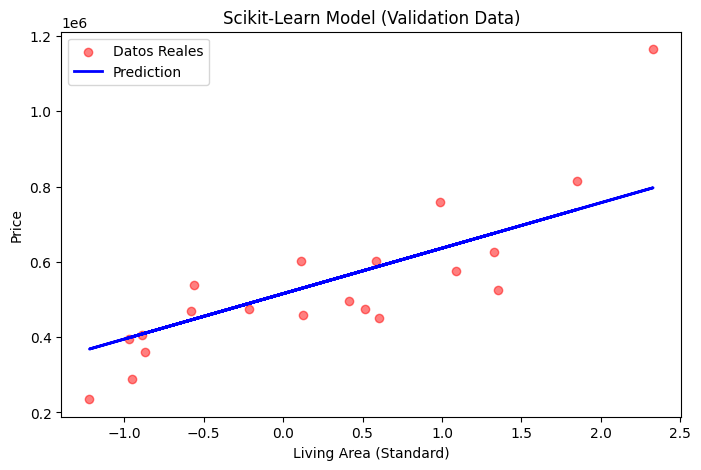

In [69]:
#Visualize the data
visualize_model(X_val, Y_val, Y_val_predicted, "Scikit-Learn Model (Validation Data)")